## Importing Modules

In [55]:
import matplotlib.pyplot as plt
import cv2
import glob
import os
import random
import jovian

## Note : 
### <i><h4>My model did not perform as I expected, If anybody tries this and got better metrics than me please feel free to share your knowledge!! After all, Knowledge is Sharing. right!!</h4></i>

## <strong>Dataset :</strong>
You can download dataset from here https://drive.google.com/open?id=1wwXhV2pNJjGdC4dsMz3NQxfhojthUbeB

### Data cleaning, naming and Data set Organising

* The below step will be executed only if dataset in unstructured data.
* Here data set is already organized, so there is no need of running this cell 

In [ ]:
## 
paths = glob.glob("C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\dataset\\test\\covid\\*")
i=0
for filename in os.listdir("C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\dataset\\train\\covid\\"): 
        dst ="train-covid" + str(i) + ".jpg"
        src = "C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train\\covid\\" + filename 
        dst = "C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train\\covid\\" + dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1

In [8]:
os.listdir("C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\test\\covid\\")

['test-covid0.jpg',
 'test-covid10.jpg',
 'test-covid11.jpg',
 'test-covid12.jpg',
 'test-covid2.jpg',
 'test-covid3.jpg',
 'test-covid4.jpg',
 'test-covid5.jpg',
 'test-covid6.jpg',
 'test-covid7.jpg',
 'test-covid8.jpg',
 'test-covid9.jpg']

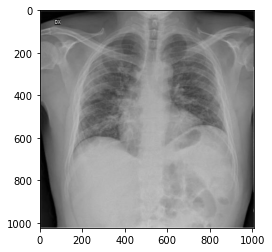

In [9]:
img1 = cv2.imread('C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train\\covid\\train-covid10.jpg')
plt.imshow(img1)

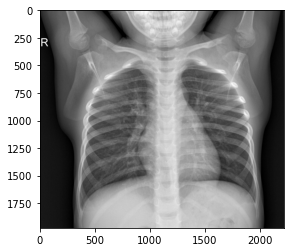

In [10]:
img2 = cv2.imread('C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train\\normal\\train-normal53.jpg')
plt.imshow(img2)

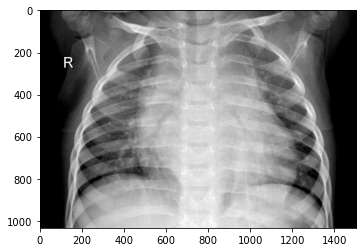

In [11]:
img3 = cv2.imread('C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train\\pneumonia\\train-pneumonia13.jpg')
plt.imshow(img3)

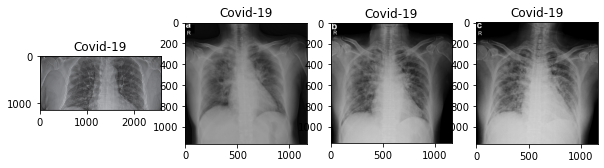

In [28]:
src_path = "C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train\\"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
path = os.path.join(src_path,sub_class[0])

# v = random.sample(range(1, 15), 4)
for i in range(4):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,'train-covid'+str(i)+'.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.title('Covid-19')

# path = os.path.join(src_path,sub_class[1])
# for i in range(4):
#     plt.subplot(240 + 1 + i)
#     img = plt.imread(os.path.join(path,'train-normal'+str(i)+'.jpg'))
#     plt.imshow(img, cmap=plt.get_cmap('gray'))
    
# path = os.path.join(src_path,sub_class[2])
# for i in range(4):
#     plt.subplot(240 + 1 + i)
#     img = plt.imread(os.path.join(path,'train-pneumonia'+str(i)+'.jpg'))
#     plt.imshow(img, cmap=plt.get_cmap('gray'))

In [29]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [30]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

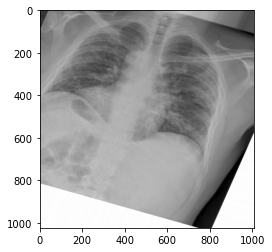

In [31]:
plt.imshow(image_gen.random_transform(img1))

In [33]:
image_gen.flow_from_directory('C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train')

Found 231 images belonging to 3 classes.


In [34]:
image_gen.flow_from_directory('C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\test')

Found 52 images belonging to 3 classes.


In [35]:
image_shape = (150,150,3)

In [36]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D

In [37]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10616960  
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

In [40]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\train',
                                               target_size=(150,150),
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 231 images belonging to 3 classes.


In [41]:
test_image_gen = image_gen.flow_from_directory('C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\test',
                                               target_size=(150,150),
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 52 images belonging to 3 classes.


In [42]:
train_image_gen.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [43]:
import warnings
import PIL.Image
warnings.filterwarnings('ignore')

In [44]:
results = model.fit_generator(train_image_gen,epochs=15,
                              steps_per_epoch=75,
                              validation_data=test_image_gen,validation_steps=10)

Epoch 1/15
75/75 [==============================] - 77s 1s/step - loss: 0.9030 - accuracy: 0.5558 - val_loss: 0.5538 - val_accuracy: 0.8529
Epoch 2/15
75/75 [==============================] - 70s 927ms/step - loss: 0.6516 - accuracy: 0.7411 - val_loss: 0.2453 - val_accuracy: 0.8226
Epoch 3/15
75/75 [==============================] - 68s 912ms/step - loss: 0.5866 - accuracy: 0.7835 - val_loss: 0.1524 - val_accuracy: 0.8897
Epoch 4/15
75/75 [==============================] - 70s 931ms/step - loss: 0.5170 - accuracy: 0.7974 - val_loss: 0.2197 - val_accuracy: 0.9355
Epoch 5/15
75/75 [==============================] - 69s 917ms/step - loss: 0.5129 - accuracy: 0.7896 - val_loss: 0.1519 - val_accuracy: 0.9265
Epoch 6/15
75/75 [==============================] - 77s 1s/step - loss: 0.4629 - accuracy: 0.8216 - val_loss: 0.1191 - val_accuracy: 0.8548
Epoch 7/15
75/75 [==============================] - 74s 987ms/step - loss: 0.4380 - accuracy: 0.8320 - val_loss: 0.1968 - val_accuracy: 0.9338
Epoch

In [45]:
results.history['accuracy']

[0.5558441,
 0.7411255,
 0.7835498,
 0.7974026,
 0.7896104,
 0.821645,
 0.83203465,
 0.83809525,
 0.8363636,
 0.83896106,
 0.8207792,
 0.84935063,
 0.85974026,
 0.830303,
 0.86926407]

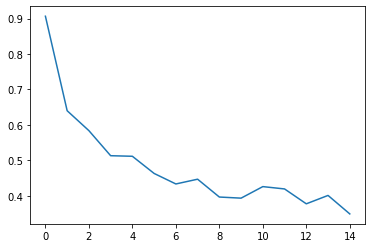

In [46]:
plt.plot(results.history['loss'])

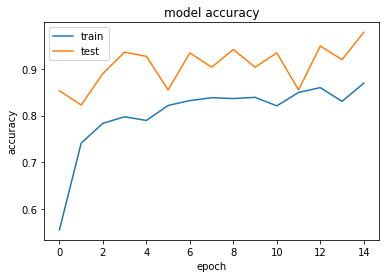

In [47]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

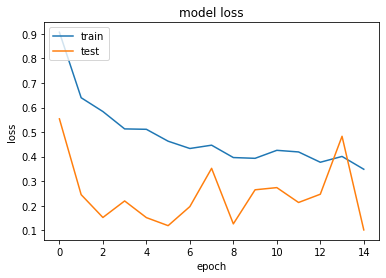

In [48]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## External Image prediction

In [49]:
train_image_gen.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [50]:
import numpy as np
from keras.preprocessing import image
coropos = 'C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\corona-ptve.png'
img = image.load_img(coropos,target_size=(150,150))
img = image.img_to_array(img)
img = img/255

In [51]:
prediction = model.predict_classes(img.reshape(1,150,150,3))

In [52]:
prediction

array([0], dtype=int64)

In [53]:
import numpy as np
from keras.preprocessing import image
coropos = 'C:\\Users\\vsneh\\Udemy-notebooks\\covid-19\\NovelCorona-Pneumonia-Healthy-Prediction\\dataset\\pneumo-ptve.jpg'
img = image.load_img(coropos,target_size=(150,150))
img = image.img_to_array(img)
img = img/255
prediction = model.predict_classes(img.reshape(1,150,150,3))
print(prediction)

[0]


In [58]:
jovian.configure()

[jovian] It looks like Jovian is already configured ( check ~/.jovian/credentials.json ).
Do you want to overwrite the existing configuration? [y/N]: y
[jovian] Removing existing configuration..
[jovian] If you're a jovian-pro user please enter your company's organization ID on Jovian (otherwise leave it blank).
Organization ID: 
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Configuration complete!


In [62]:
jovian.commit(project="v-snehith999/corona-pneumonia-normal-keras",environment='none')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "v-snehith999/corona-pneumonia-normal-keras" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/v-snehith999/corona-pneumonia-normal-keras
